# Class 05 - Deep Learning CNN

In [23]:
from tensorflow.keras import datasets, layers, models

In [24]:
(img_train, label_train), (img_test, label_test) = datasets.cifar10.load_data()

img_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [25]:
img_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [26]:
import matplotlib.pyplot as plt

In [27]:

label_names = ["Avião", "Carro", "Pássaro", "Gato", "Veado", "Cachorro", "Sapo", "Cavalo", "Navio", "Caminhão"]

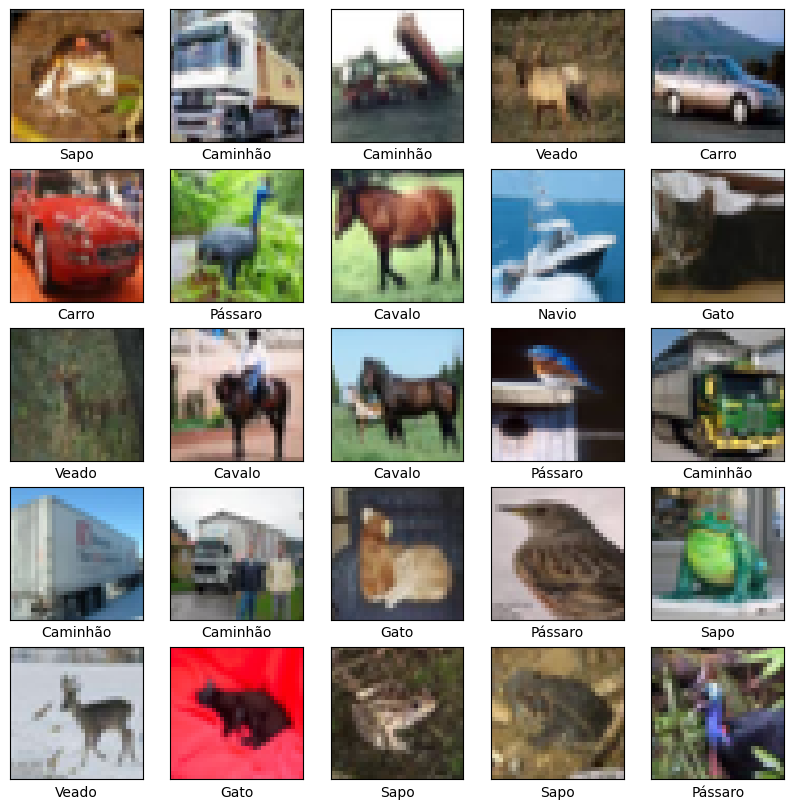

In [28]:
plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(img_train[i])
  plt.xlabel(label_names[label_train[i][0]])
  plt.xticks([])
  plt.yticks([])

# Model

In [29]:
img_train = img_train / 255.0
img_test = img_test / 255.0

In [30]:
img_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [31]:
# feature learning
model = models.Sequential()

# first layer
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3), padding="same"))
model.add(layers.MaxPool2D((2, 2), padding="same"))

# intermediary layer
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.MaxPool2D((2, 2), padding="same"))

# intermediary layer
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.MaxPool2D((2, 2), padding="same"))

In [32]:
# classification
model.add(layers.Flatten()) # Vetor 1D
model.add(layers.Dense(64, activation="relu")) # connected
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [34]:
model_predict = model.fit(img_train, label_train, epochs=3, validation_data=(img_test, label_test))

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.4701 - loss: 1.4633 - val_accuracy: 0.5868 - val_loss: 1.1597
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.6357 - loss: 1.0354 - val_accuracy: 0.6194 - val_loss: 1.0694
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.6920 - loss: 0.8791 - val_accuracy: 0.6779 - val_loss: 0.9037


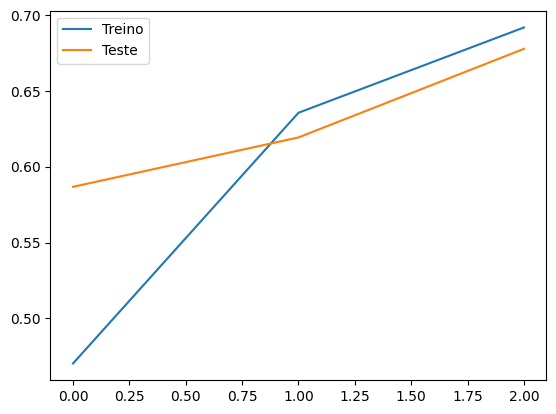

In [35]:
plt.plot(model_predict.history["accuracy"], label="Treino")
plt.plot(model_predict.history["val_accuracy"], label="Teste")
plt.legend()

In [36]:
model.evaluate(img_test, label_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6779 - loss: 0.9037


[0.9037339687347412, 0.6779000163078308]

# Deploy

In [37]:
from PIL import Image

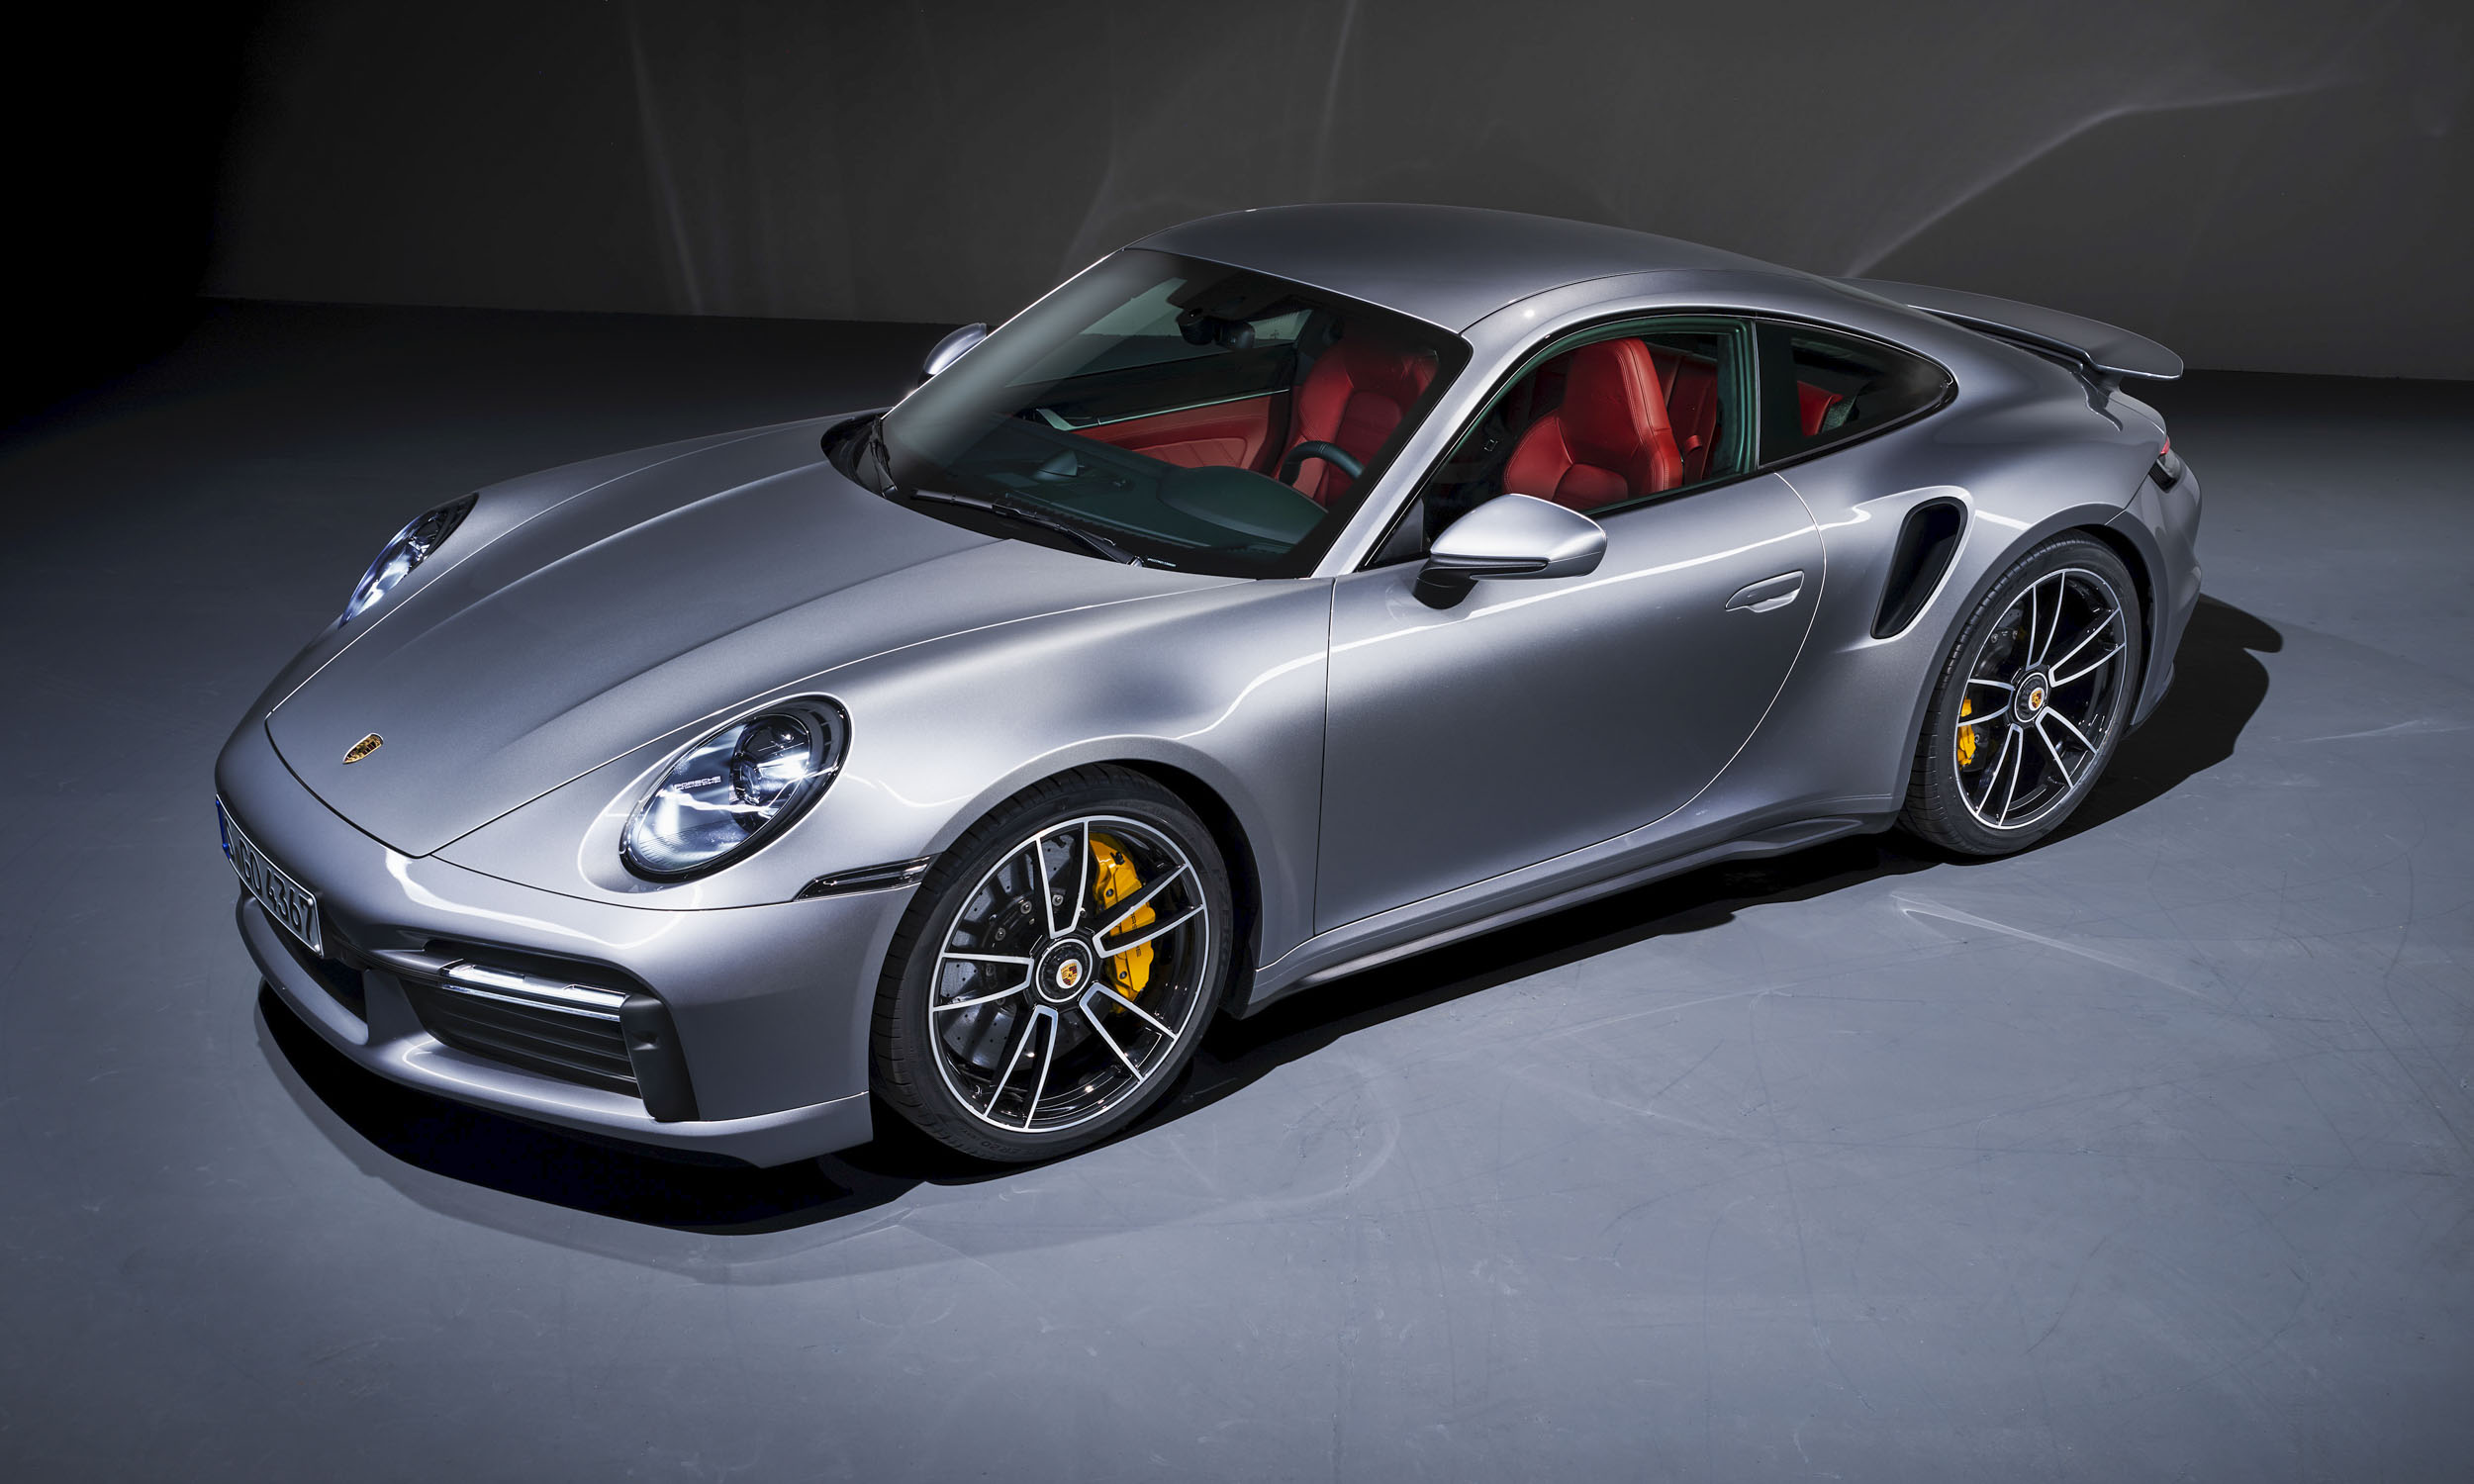

In [38]:
new_image = Image.open("./images/car.png")
new_image

In [39]:
new_image.size

(2500, 1500)

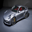

In [40]:
new_image = new_image.resize((32, 32))
new_image

In [41]:
new_image.size

(32, 32)

In [42]:
import numpy as np

In [43]:
new_image = np.array([new_image]) / 255.0
new_image

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.22352941, 0.22352941, 0.22352941],
         [0.21176471, 0.21176471, 0.21960784],
         [0.2       , 0.2       , 0.20392157]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.23529412, 0.23529412, 0.24705882],
         [0.21960784, 0.21568627, 0.22745098],
         [0.20392157, 0.2       , 0.21176471]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.22745098, 0.22745098, 0.23529412],
         [0.21568627, 0.21568627, 0.21960784],
         [0.20784314, 0.20392157, 0.21568627]],

        ...,

        [[0.25098039, 0.2745098 , 0.32941176],
         [0.2627451 , 0.28627451, 0.34509804]

In [44]:
predict = model.predict(new_image)
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


array([[2.8322593e-03, 9.7124016e-01, 6.0893526e-05, 4.9514230e-04,
        6.3620319e-05, 7.9108773e-05, 6.4377260e-04, 7.0969431e-06,
        4.5014801e-03, 2.0076506e-02]], dtype=float32)

In [45]:
max_predict = np.argmax(predict)
label_names[max_predict]

'Carro'

In [61]:
predict = model.predict(new_image)

result = []

for i, v in enumerate(predict[0]):
  result.append({
    "index": i, 
    "name": label_names[i], 
    "percentage": v
  })

result.sort(key=lambda x: x["percentage"], reverse=True)

for i in result:
  print(f"{i['index']} - {i['name']:<8} => {i['percentage']*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1 - Carro    => 97.12%
9 - Caminhão => 2.01%
8 - Navio    => 0.45%
0 - Avião    => 0.28%
6 - Sapo     => 0.06%
3 - Gato     => 0.05%
5 - Cachorro => 0.01%
4 - Veado    => 0.01%
2 - Pássaro  => 0.01%
7 - Cavalo   => 0.00%
